In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from flows import Flow
from flows.affine import Planar
from flows.sylvester import TriangularSylvester
from models.vae import GatedConvVAE

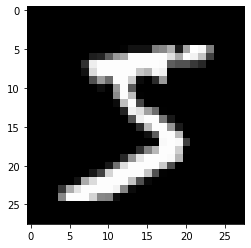

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train / 255
X_test = X_test / 255
plt.imshow(X_train[0], cmap='gray')

In [3]:
def train_vae(flow=None, z_size=32, n_epochs=10):
    x_train = np.expand_dims(X_train, axis=-1)
    beta_update = lambda i, beta: 2.0E-4/tf.math.exp(-i)
    vae = GatedConvVAE(x_train.shape[1], x_train.shape[2], flow, z_size=z_size, beta_update_fn=beta_update)
    vae.fit(x_train, x_train, epochs=n_epochs, batch_size=128)
    return vae

### Vanilla VAE

In [4]:
vae = train_vae(n_epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 29s 488us/sample - loss: 0.3166
Epoch 2/10
60000/60000 [==============================] - 25s 417us/sample - loss: 0.2625
Epoch 3/10
60000/60000 [==============================] - 25s 416us/sample - loss: 0.2519
Epoch 4/10
60000/60000 [==============================] - 25s 418us/sample - loss: 0.2471
Epoch 5/10
60000/60000 [==============================] - 25s 414us/sample - loss: 0.2441
Epoch 6/10
60000/60000 [==============================] - 25s 415us/sample - loss: 0.2410
Epoch 7/10
60000/60000 [==============================] - 25s 414us/sample - loss: 0.2382
Epoch 8/10
60000/60000 [==============================] - 25s 418us/sample - loss: 0.2357
Epoch 9/10
60000/60000 [==============================] - 25s 416us/sample - loss: 0.2336
Epoch 10/10
60000/60000 [==============================] - 25s 417us/sample - loss: 0.2318


In [5]:
x_test = np.expand_dims(X_test, axis=-1)
x_pred = vae.predict(x_test)

In [8]:
def show_images(x_test, x_pred):
    plt.subplot(2,4,1)
    plt.imshow(x_test[0], cmap='gray')
    plt.subplot(2,4,2)
    plt.imshow(x_test[1], cmap='gray')
    plt.subplot(2,4,3)
    plt.imshow(x_test[2], cmap='gray')
    plt.subplot(2,4,4)
    plt.imshow(x_test[3], cmap='gray')
    plt.subplot(2,4,5)
    plt.imshow(x_pred[0].squeeze(), cmap='gray')
    plt.subplot(2,4,6)
    plt.imshow(x_pred[1].squeeze(), cmap='gray')
    plt.subplot(2,4,7)
    plt.imshow(x_pred[2].squeeze(), cmap='gray')
    plt.subplot(2,4,8)
    plt.imshow(x_pred[3].squeeze(), cmap='gray')
    plt.show()

In [ ]:
z_mu, z_log_sigma, params = vae.encoder.predict(x_test[10:11])
plt.figure(figsize=(4*6,2*4))
for i in range(1,9):
    x_pred = vae.decoder.predict([z_mu, z_log_sigma, params])
    plt.subplot(2,4,i)
    plt.imshow(tf.squeeze(x_pred).numpy())

### Planar VAE

In [4]:
n_flows = 8
planar_flow = Flow(n_flows, lambda i: Planar())

In [5]:
planar_vae = train_vae(flow=flow, n_epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 40s 675us/sample - loss: 0.3051
Epoch 2/10
60000/60000 [==============================] - 31s 520us/sample - loss: 0.2561
Epoch 3/10
60000/60000 [==============================] - 31s 522us/sample - loss: 0.2472
Epoch 4/10
60000/60000 [==============================] - 31s 522us/sample - loss: 0.2419
Epoch 5/10
60000/60000 [==============================] - 31s 521us/sample - loss: 0.2386
Epoch 6/10
60000/60000 [==============================] - 31s 523us/sample - loss: 0.2362 - los 
Epoch 7/10
60000/60000 [==============================] - 31s 523us/sample - loss: 0.2341
Epoch 8/10
60000/60000 [==============================] - 31s 522us/sample - loss: 0.2322 
Epoch 9/10
60000/60000 [==============================] - 31s 521us/sample - loss: 0.2308
Epoch 10/10
60000/60000 [==============================] - 31s 523us/sample - loss: 0.2296


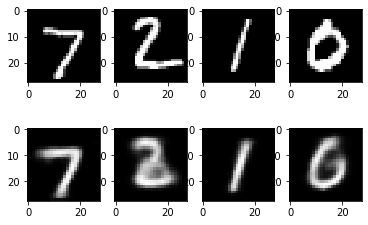

In [9]:
x_test = np.expand_dims(X_test, axis=-1)
x_pred = planar_vae.predict(x_test)
show_images(x_test.squeeze(), x_pred)

### Triangular Sylvester Flows

In [4]:
n_flows = 4
tsnf_flow = Flow(n_flows, lambda i: TriangularSylvester(flip_z = i % 2 != 0))

In [5]:
tsnf_vae = train_vae(flow=tsnf_flow, n_epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 41s 681us/sample - loss: 0.3065
Epoch 2/10
60000/60000 [==============================] - 34s 567us/sample - loss: 0.2517
Epoch 3/10
60000/60000 [==============================] - 34s 566us/sample - loss: 0.2429
Epoch 4/10
60000/60000 [==============================] - 34s 566us/sample - loss: 0.2384
Epoch 5/10
60000/60000 [==============================] - 34s 566us/sample - loss: 0.2356
Epoch 6/10
60000/60000 [==============================] - 34s 565us/sample - loss: 0.2335
Epoch 7/10
60000/60000 [==============================] - 34s 566us/sample - loss: 0.2313
Epoch 8/10
60000/60000 [==============================] - 34s 566us/sample - loss: 0.2297
Epoch 9/10
60000/60000 [==============================] - 34s 566us/sample - loss: 0.2284
Epoch 10/10
60000/60000 [==============================] - 34s 566us/sample - loss: 0.2272


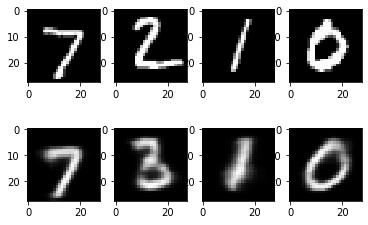

In [9]:
x_test = np.expand_dims(X_test, axis=-1)
x_pred = tsnf_vae.predict(x_test)
show_images(x_test.squeeze(), x_pred)